In [5]:
# rastermap algorithm
import sys
sys.path.append('/home/maria/Documents/rastermap/rastermap')
import mapping, imp
imp.reload(mapping)
import numpy as np


U=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_U_ep_numpy.npy')
model = mapping.Rastermap(n_components=2,alpha=1.5).fit(U)

nmin 150
0.0049512386322021484
0.07302474975585938
0.08281755447387695
0.1135263442993164
(1520, 1600)
(70,)
1.5
time; iteration;  explained PC variance
0.43s     0        0.0701      8
3.57s    10        0.2943      24
6.43s    20        0.3835      80
9.38s    30        0.4745      360
12.52s    40        0.5197      840
15.54s    50        0.5491      1520
18.73s    60        0.5497      1520
21.69s   final      0.5497
79.33s upsampled    0.5497


In [6]:
isort = np.argsort(model.embedding[:,0])
print(isort)

[8882 7652 9349 ... 6884 5789 8227]


In [7]:
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import zscore
import os
%matplotlib inline


Sm = gaussian_filter1d(U[isort,:].T, np.minimum(3,int(U.shape[0]*0.005)), axis=1)
Sm = Sm.T
print(Sm)

[[0.1602123  0.         0.         ... 0.         0.         0.        ]
 [0.16407611 0.         0.         ... 0.         0.         0.        ]
 [0.16879393 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.39227496 0.         ... 0.         0.         0.        ]
 [0.         0.41238369 0.         ... 0.         0.         0.        ]
 [0.         0.42827732 0.         ... 0.         0.         0.        ]]


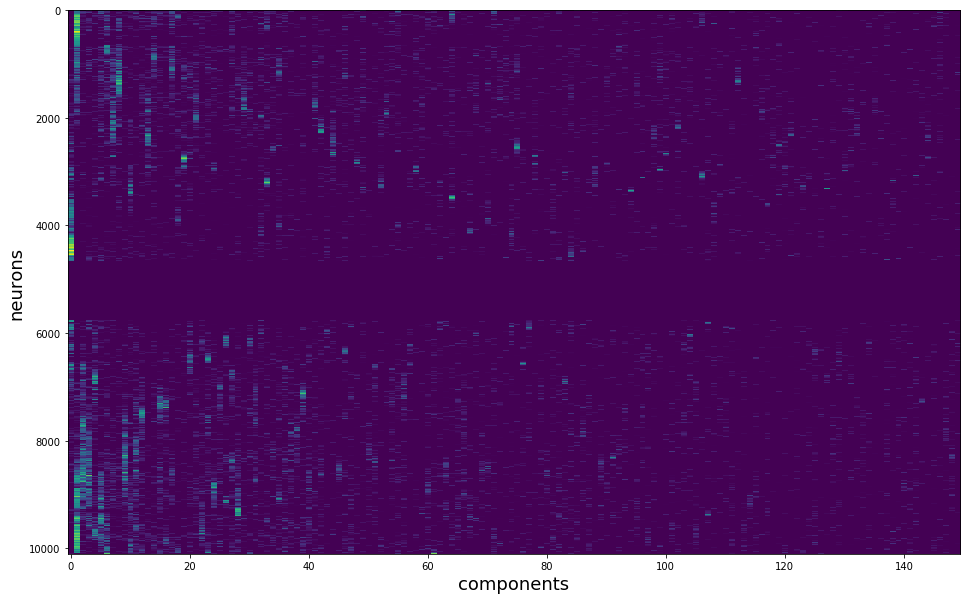

In [8]:
### view neuron sorting
fs = 2.5 # sampling rate of data in Hz
splot = Sm[::-1,]
plt.figure(figsize=(16,10))
ax=plt.imshow(splot, vmin=0,vmax=1.5,aspect='auto')
plt.xlabel('components', fontsize=18)
plt.ylabel('neurons', fontsize=18)
plt.show()